In [1]:
!pwd

/Users/serdar/Documents/udel/python/nlpDisaster


In [2]:
!pip list

Package                Version  
---------------------- ---------
absl-py                0.11.0   
appnope                0.1.2    
argon2-cffi            20.1.0   
astunparse             1.6.3    
async-generator        1.10     
attrs                  20.3.0   
backcall               0.2.0    
bleach                 3.3.0    
cachetools             4.2.1    
certifi                2020.12.5
cffi                   1.14.5   
chardet                4.0.0    
cycler                 0.10.0   
decorator              4.4.2    
defusedxml             0.6.0    
entrypoints            0.3      
flatbuffers            1.12     
gast                   0.3.3    
google-auth            1.26.1   
google-auth-oauthlib   0.4.2    
google-pasta           0.2.0    
grpcio                 1.32.0   
h5py                   2.10.0   
idna                   2.10     
importlib-metadata     3.4.0    
ipykernel              5.4.3    
ipython                7.16.1   
ipython-genutils       0.2.0    
ipywidgets

In [2]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

import preprocess_kgptalkie as kgp

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
data1 = pd.read_csv('./data/train.csv')

In [8]:
data1.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [9]:
data2 = pd.read_csv('./data/train1.csv')

In [10]:
data2.head()

id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0

In [11]:
tweet = data1.append(data2)

In [12]:
tweet.shape

(18983, 5)

In [19]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18983 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        18983 non-null  int64 
 1   keyword   18922 non-null  object
 2   location  13032 non-null  object
 3   text      18983 non-null  object
 4   target    18983 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 889.8+ KB


# Exploratory Data Analysis

In [20]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 120

### Target Class Distribution

/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Real or Not Real Disaster Tweet')

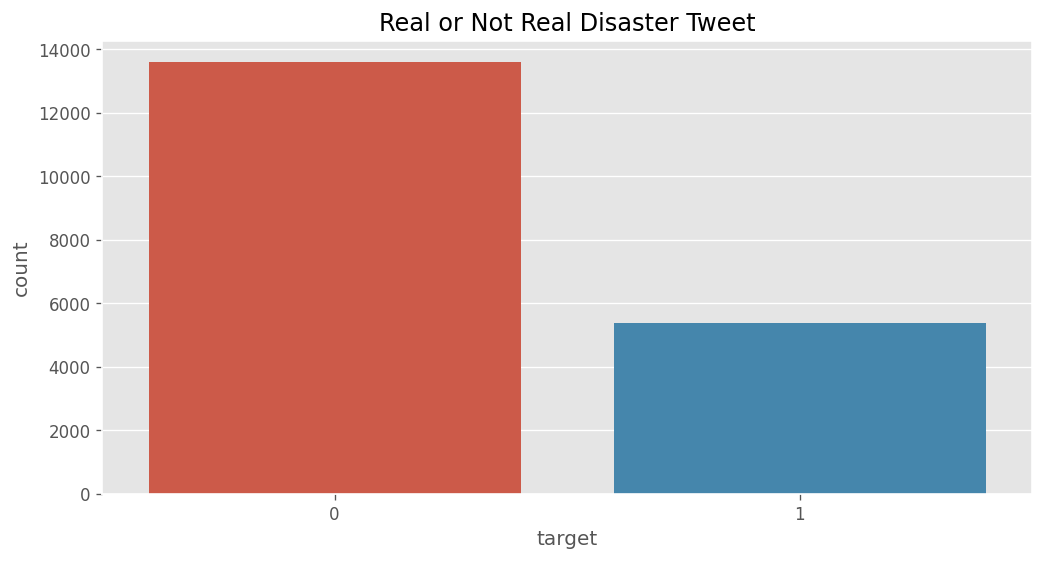

In [21]:
sns.countplot('target', data=tweet)
plt.title('Real or Not Real Disaster Tweet')

In [22]:
tweet['target'].value_counts()

0    13598
1     5385
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

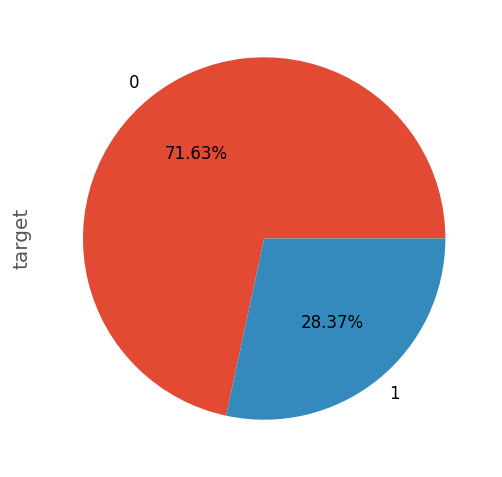

In [25]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')

### Numver of Characters Distribution in Tweets

In [84]:
!python --version

Python 3.6.7


In [83]:
import bin.preprocess_kgptalkie as kgp

ModuleNotFoundError: No module named 'bin.preprocess_kgptalkie'

In [85]:
kgp.get_basic_features(tweet)

NameError: name 'kgp' is not defined

In [37]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/g5/g8sbvqw539q48nl5jbrvgd_40000gp/T/pip-req-build-yqejycxq
  Running setup.py bdist_wheel for preprocess-kgptalkie ... done
  Stored in directory: /private/var/folders/g5/g8sbvqw539q48nl5jbrvgd_40000gp/T/pip-ephem-wheel-cache-eylrtkvu/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
!pip3 list

Package                Version   
---------------------- ----------
absl-py                0.11.0    
appnope                0.1.2     
argon2-cffi            20.1.0    
astunparse             1.6.3     
async-generator        1.10      
attrs                  20.3.0    
backcall               0.2.0     
beautifulsoup4         4.9.1     
bleach                 3.3.0     
blis                   0.4.1     
cachetools             4.2.1     
catalogue              1.0.0     
certifi                2020.12.5 
cffi                   1.14.5    
chardet                4.0.0     
click                  7.1.2     
cycler                 0.10.0    
cymem                  2.0.5     
decorator              4.4.2     
defusedxml             0.6.0     
en-core-web-sm         2.2.5     
entrypoints            0.3       
flatbuffers            1.12      
gast                   0.3.3     
google-auth            1.26.1    
google-auth-oauthlib   0.4.2     
google-pasta           0.2.0     
grpcio        

In [41]:
tweet = kgp.get_basic_features(tweet)

In [42]:
tweet.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  char_counts  word_counts  avg_wordlength  stopwords_counts  \
0       1           57           13        4.384615                 6   
1       1           32            7        4.571429                 0   
2       1          112           22        5.090909                 9   
3       1           57            8        7.125000                 1   
4       1           72           16        4.500000                 6   

   hashtag_counts  mentions_counts  digits_counts  uppercase_counts  
0               1                0              0                 1  
1               0                0              1                 0  
2               0                0              1                 0  
3               1                0              1                 0  
4               2                0              0                 0

/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='char_counts', ylabel='Density'>

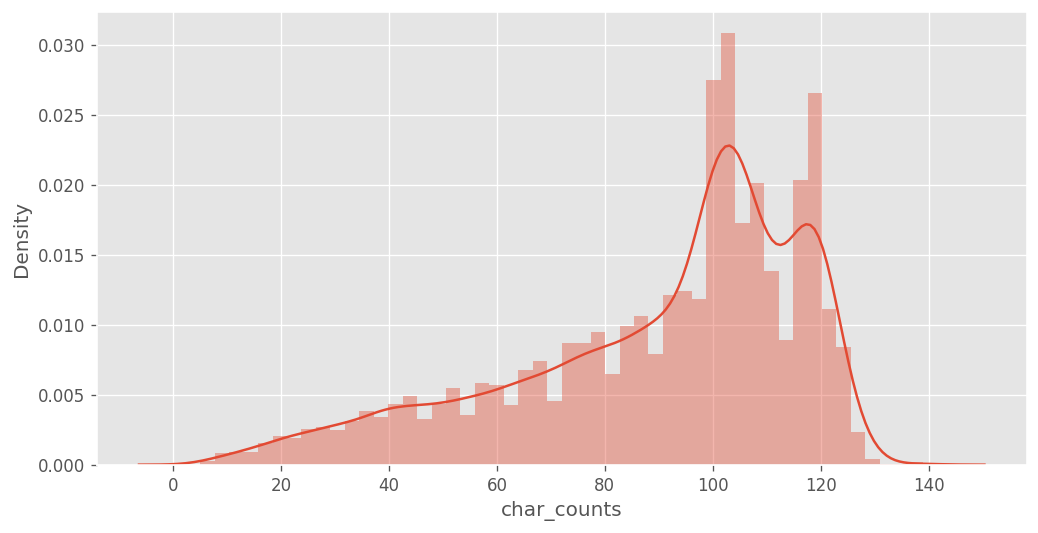

In [43]:
sns.distplot(tweet['char_counts'])

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

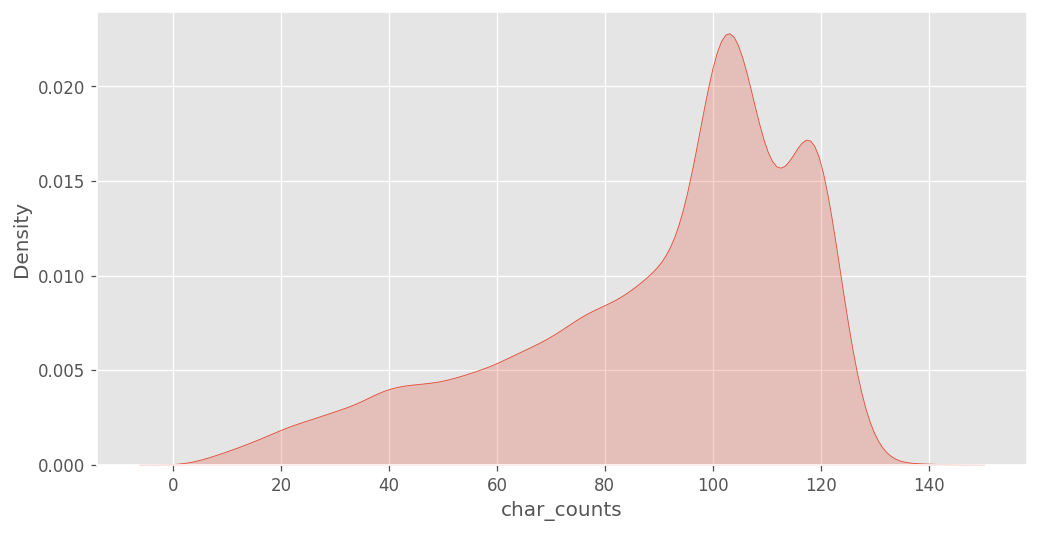

In [47]:
sns.kdeplot(tweet['char_counts'], shade=True)

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

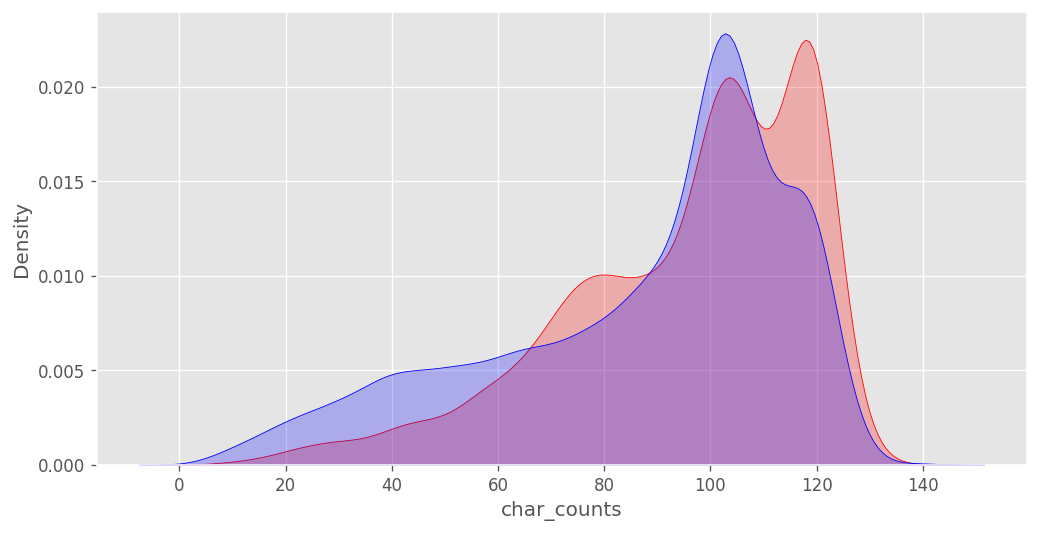

In [53]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')

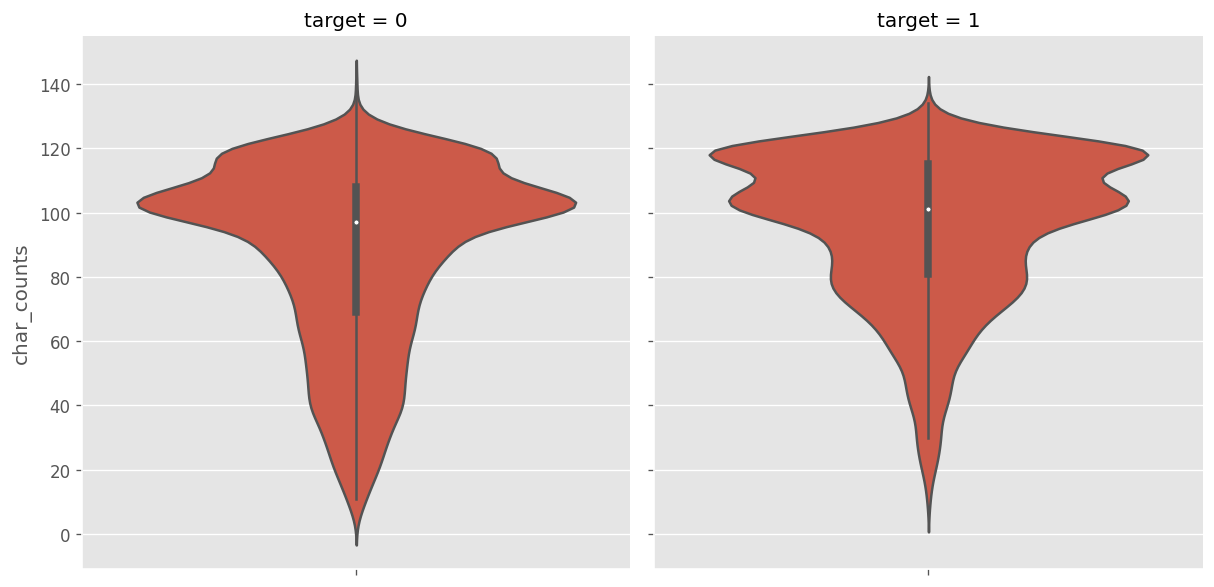

In [50]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='target')

#### Number of Words, Average Words Length, and Stop words Distribution in Tweets

<AxesSubplot:xlabel='word_counts', ylabel='Density'>

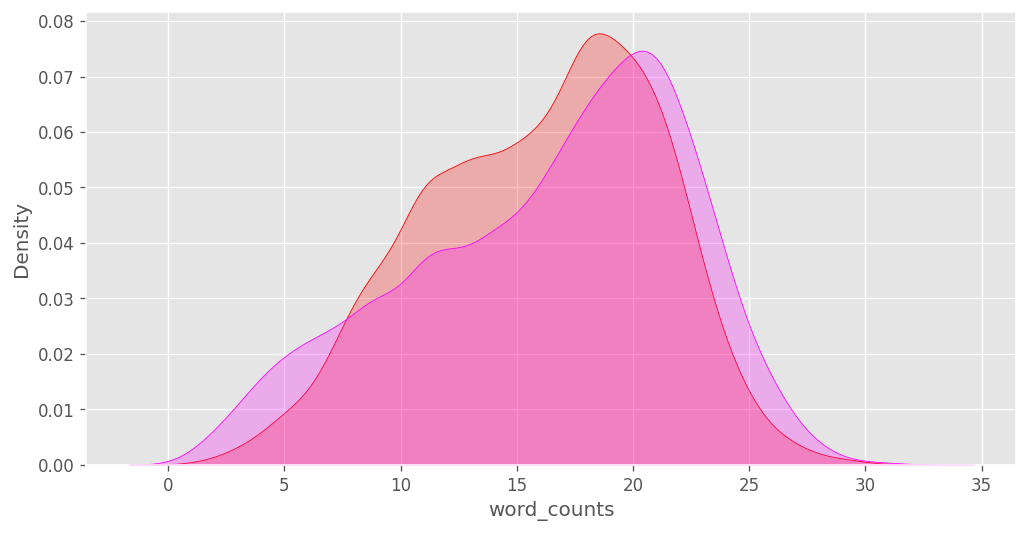

In [55]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='magenta')

<AxesSubplot:xlabel='avg_wordlength', ylabel='Density'>

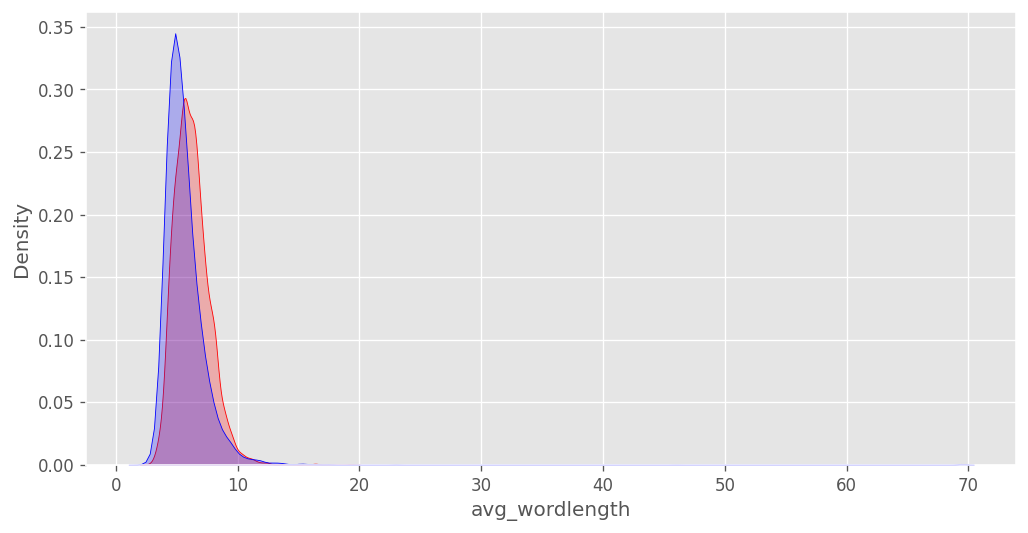

In [57]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True, color='blue')

<AxesSubplot:xlabel='stopwords_counts', ylabel='Density'>

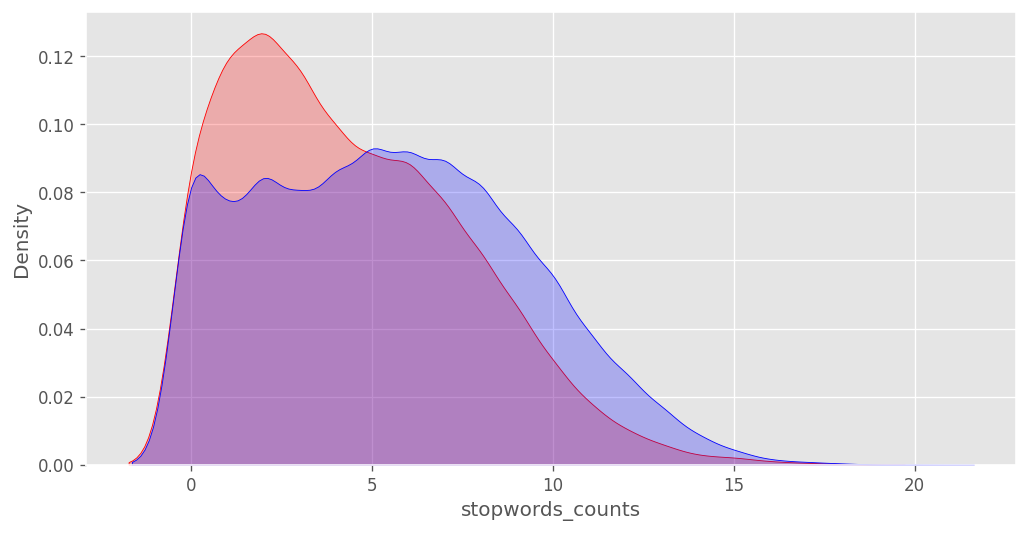

In [59]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='blue')

#### Most common and least words

In [62]:
freqs = kgp.get_word_freqs(tweet, 'text')

In [63]:
top20 = freqs[:20]

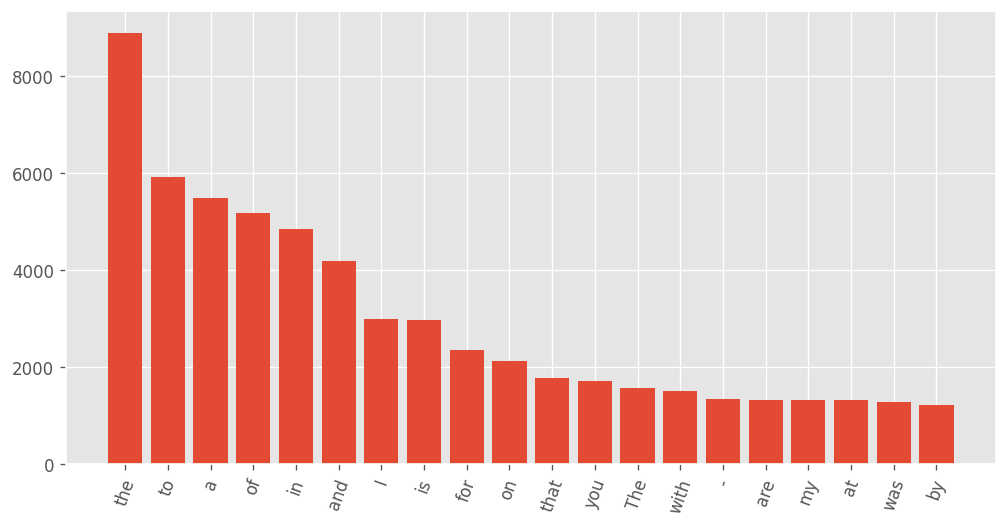

In [67]:
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.show()

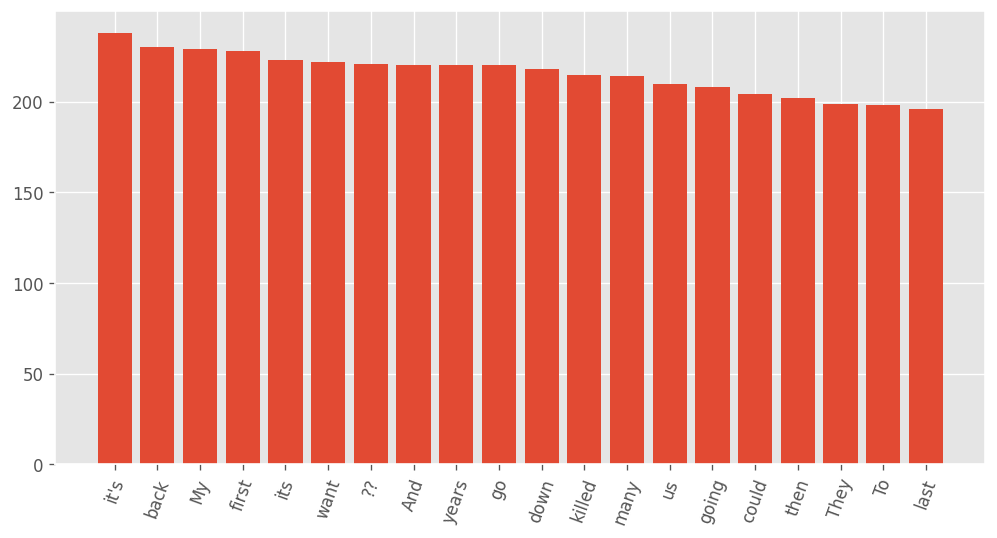

In [71]:
top40 = freqs[100:120]
plt.bar(top40.index, top40.values)
plt.xticks(rotation=70)
plt.show()

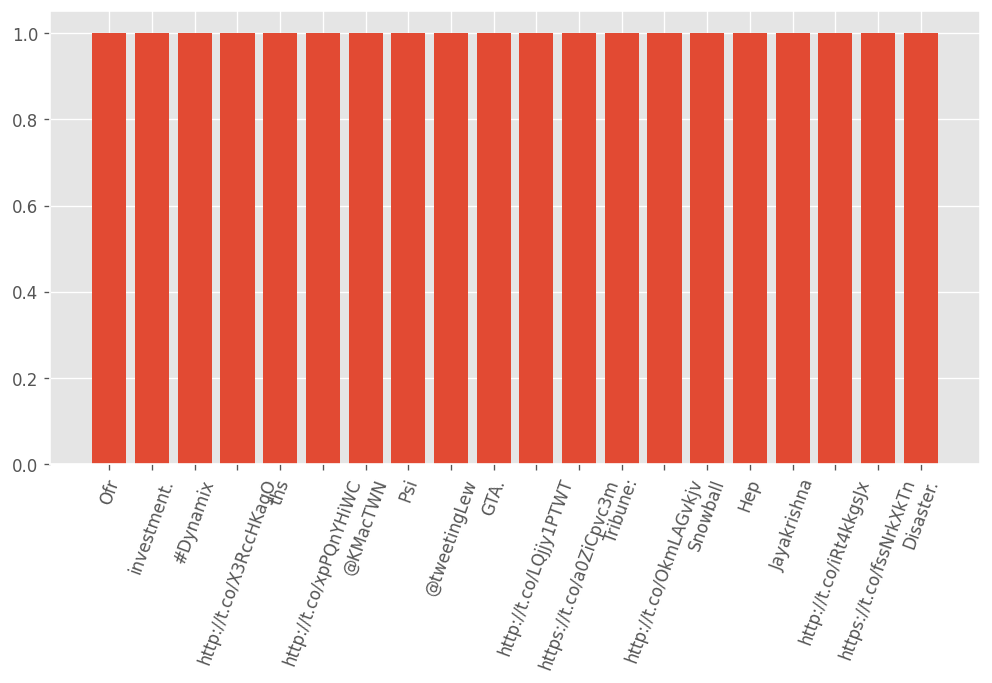

In [74]:
least20 = freqs[-20:]
plt.bar(least20.index, least20.values)
plt.xticks(rotation=70)
plt.show()

In [76]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)

In [78]:
bigram[:20]

[('𝗳𝗼𝗿 𝗠𝗔𝗬', 167559),
 ('𝗣𝗲𝘁𝗿𝗼𝘁𝗲𝗾 𝗘𝗻𝗲𝗿𝗴𝘆', 167558),
 ('𝗠𝗔𝗬 griptok', 167557),
 ('𝗜𝗻𝗰 what', 167556),
 ('𝗚𝗶𝘃𝗲𝗮𝘄𝗮𝘆 𝗳𝗼𝗿', 167555),
 ('𝗘𝗻𝗲𝗿𝗴𝘆 𝗜𝗻𝗰', 167554),
 ('𝗖𝗢𝗥𝗧 do', 167553),
 ('𝒗𝒂𝒍𝒆𝒏𝒕𝒊𝒏𝒆 didn', 167552),
 ('𝒋𝒊𝒍𝒍 𝒗𝒂𝒍𝒆𝒏𝒕𝒊𝒏𝒆', 167551),
 ('𝐲𝐨𝐮 방찬', 167550),
 ('𝐭𝐨 𝐲𝐨𝐮', 167549),
 ('𝐭𝐢𝐠𝐡𝐭 𝐭𝐨', 167548),
 ('𝐭𝐡𝐢𝐧𝐠𝐬 𝐧𝐞𝐯𝐞𝐫', 167547),
 ('𝐨𝐧 𝐭𝐢𝐠𝐡𝐭', 167546),
 ('𝐧𝐞𝐯𝐞𝐫 𝐜𝐡𝐚𝐧𝐠𝐞', 167545),
 ('𝐡𝐨𝐰 𝐡𝐨𝐥𝐝𝐢𝐧𝐠', 167544),
 ('𝐡𝐨𝐥𝐝𝐢𝐧𝐠 𝐨𝐧', 167543),
 ('𝐜𝐡𝐚𝐧𝐠𝐞 𝐋𝐢𝐤𝐞', 167542),
 ('𝐒𝐨𝐦𝐞 𝐭𝐡𝐢𝐧𝐠𝐬', 167541),
 ('𝐋𝐢𝐤𝐞 𝐡𝐨𝐰', 167540)]

In [79]:
bigram[-20:]

[('00 tonight', 19),
 ('00 to', 18),
 ('00 thursday', 17),
 ('00 thread', 16),
 ('00 refugees', 15),
 ('00 pm', 14),
 ('00 obs', 13),
 ('00 in', 12),
 ('00 https', 11),
 ('00 http', 10),
 ('00 hour', 9),
 ('00 hiroshima', 8),
 ('00 buri', 7),
 ('00 bu', 6),
 ('00 bestseller', 5),
 ('00 at', 4),
 ('00 am', 3),
 ('00 52', 2),
 ('00 25', 1),
 ('00 11', 0)]

#### One-Shot Data Clearning

In [13]:
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    #x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [88]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

In [89]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [90]:
kgp.get_ngram(tweet, 'text', ngram_range=2)

[('zxathetis are', 167128),
 ('zw are', 167127),
 ('zurich for', 167126),
 ('zurich and', 167125),
 ('zumiez is', 167124),
 ('zuma did', 167123),
 ('zulaykhas son', 167122),
 ('zulaikhas son', 167121),
 ('zuckerberg views', 167120),
 ('zuckerberg if', 167119),
 ('zss vs', 167118),
 ('zoyas scowl', 167117),
 ('zourryart forgot', 167116),
 ('zouma just', 167115),
 ('zouma has', 167114),
 ('zotar50 skeleton', 167113),
 ('zorro perpetual', 167112),
 ('zoomedin version', 167111),
 ('zoom video', 167110),
 ('zoom it', 167109),
 ('zoom in', 167108),
 ('zoo these', 167107),
 ('zoo on', 167106),
 ('zonewolf123 liked', 167105),
 ('zonesthank god', 167104),
 ('zones donuat', 167103),
 ('zone with', 167102),
 ('zone what', 167101),
 ('zone was', 167100),
 ('zone war', 167099),
 ('zone this', 167098),
 ('zone they', 167097),
 ('zone thebachelorabc', 167096),
 ('zone the', 167095),
 ('zone that', 167094),
 ('zone so', 167093),
 ('zone she', 167092),
 ('zone protectdenaliwolves', 167091),
 ('zone pro

#### Disaster Words Visualization with Word Cloud

In [94]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)

In [97]:
real

'the httpt in a of to httpst and is on for at i by from that was after with are this have it as you an fire not has people been were my over be amp news more killed up we no who just via police they now but out there storm train suicide all disaster so fires will when two 2 about emergency attack one into like california than new dead thunderstorm iran nuclear am do crash severe 1 volcano s he what buildings warning bomb if some down their families accident his us years today due your bombing prime man minister had 4 or video still near hiroshima bus how me get off earthquake home first collision sinkhole war car our found hit road derailment wildfire homes least burning air 5 can under during australia before injured its many city 3 china weather death mh370 time retweet bomber northern may being since forest mass taal another would last could water those outbreak her fatal army south update year world legionnaires missing rain 6 watch oil island obama services latest floods area here

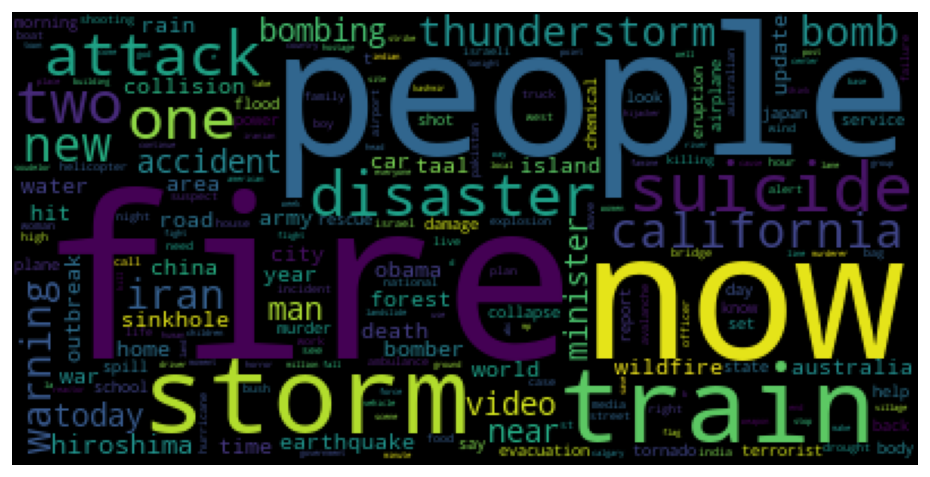

In [98]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [100]:
nreal = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
nreal

'the to httpst a i of and is in you for httpt it that on my not this with are have be was at by we from but so me like do will your they just all as if he out amp an has when about up am what can no who people or one how his get now would our there us new its been more their after know her had she time were why into see some them should did because fire 2 im need back only over think being first off body still love go want him got then before emergency day let good years 1 man than really these loud here world today could please much cannot going many t help too any never even right down way make youre say also video last 3 s trump via god said where life dont take does news every burning come those well storm while two which work death most fires nuclear oh year made w iran ass great feel fear very someone same 4 5 look bomb another bad stop other best full retweet everyone attack always heart against getting laughing may disaster put police read ever mass war again home shit live cha

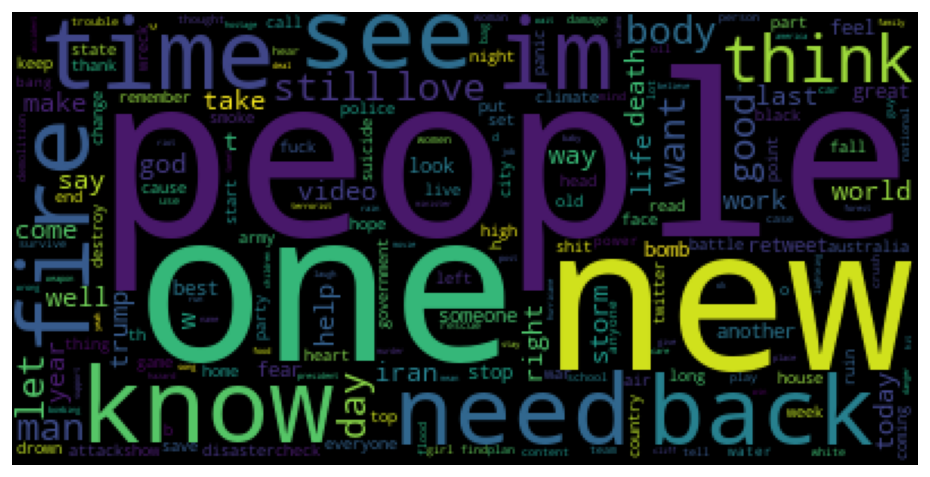

In [101]:
nword_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(nword_cloud)
plt.axis('off')
plt.show()

In [105]:
type(tweet)

pandas.core.frame.DataFrame

In [106]:
tweet.to_pickle('traininData.pickle')

# Classification with TFIDF and SVM

In [3]:
from sklearn.svm import LinearSVC
import pickle

In [4]:
with open('traininData.pickle', 'rb') as file:
    tweet = pickle.load(file)

In [5]:
text = tweet['text']
y = tweet['target']

In [26]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [27]:
X.shape

(18983, 42920)

In [28]:
X

<18983x42920 sparse matrix of type '<class 'numpy.float64'>'
	with 287670 stored elements in Compressed Sparse Row format>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
X_test

<3797x42920 sparse matrix of type '<class 'numpy.float64'>'
	with 57640 stored elements in Compressed Sparse Row format>

In [31]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))

In [33]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2720
           1       0.82      0.63      0.71      1077

    accuracy                           0.85      3797
   macro avg       0.84      0.79      0.81      3797
weighted avg       0.85      0.85      0.85      3797

CPU times: user 113 ms, sys: 12.8 ms, total: 125 ms
Wall time: 125 ms


# Auto ML

In [6]:
import evalml
from evalml import AutoMLSearch

In [9]:
tweet.head()

id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this earthquake ma...   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  all residents asked to shelter in place are be...   
3   6     NaN      NaN  130 people receive wildfires evacuation orders...   
4   7     NaN      NaN  just got sent this photo from ruby alaska as s...   

   target  char_counts  word_counts  avg_wordlength  stopwords_counts  \
0       1           57           13        4.384615                 6   
1       1           32            7        4.571429                 0   
2       1          112           22        5.090909                 9   
3       1           57            8        7.125000                 1   
4       1           72           16        4.500000                 6   

   hashtag_counts  mentions_counts  digits_counts  uppercase_counts  
0               1                0              0                 1  
1               0                0              1                 0  
2               0                0              1                 0  
3               1                0              1                 0  
4               2                0              0                 0

In [19]:
from urllib.request import urlopen
import pandas as pd

# input_data = urlopen('https://featurelabs-static.s3.amazonaws.com/spam_text_messages_modified.csv')
# data = pd.read_csv(input_data)

X = tweet['text'].to_frame()
y = tweet['target']

display(X.head())

text
0  our deeds are the reason of this earthquake ma...
1              forest fire near la ronge sask canada
2  all residents asked to shelter in place are be...
3  130 people receive wildfires evacuation orders...
4  just got sent this photo from ruby alaska as s...

In [20]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [21]:
y.value_counts(normalize=True)

0    0.716325
1    0.283675
Name: target, dtype: float64

In [22]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='binary', test_size=0.2, random_state=0)

In [23]:
X_train.types

Physical Type     Logical Type Semantic Tag(s)
Data Column                                               
text               string  NaturalLanguage              []

In [25]:
automl = AutoMLSearch(X_train=X_train, y_train=y_train,
                      problem_type='binary',
                      max_batches=1,
                      optimize_thresholds=True)

automl.search()

Generating pipelines to search over...
*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: decision_tree, extra_trees, xgboost, catboost, linear_model, lightgbm, random_forest



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 9.798
Batch 1: (2/9) Logistic Regression Classifier w/ Imp... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.516
Batch 1: (3/9) Random Forest Classifier w/ Imputer +... Elapsed:01:21
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.498
Batch 1: (4/9) XGBoost Classifier w/ Imputer + Text ... Elapsed:02:42
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.504
Batch 1: (5/9) CatBoost Classifier w/ Imputer + Text... Elapsed:04:08
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.620
Batch 1: (6/9) Elastic Net Classifier w/ Imputer + T... Elapsed:05:25
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.596
Batch 1: (7/9) Extra Trees Classifier w/ Imputer + T... Elapsed:06:44
	Start

In [26]:
automl.rankings

id                                      pipeline_name     score  \
0   2  Random Forest Classifier w/ Imputer + Text Fea...  0.498073   
1   3  XGBoost Classifier w/ Imputer + Text Featuriza...  0.504019   
2   7  LightGBM Classifier w/ Imputer + Text Featuriz...  0.504853   
3   1  Logistic Regression Classifier w/ Imputer + Te...  0.515565   
4   6  Extra Trees Classifier w/ Imputer + Text Featu...  0.521890   
5   8  Decision Tree Classifier w/ Imputer + Text Fea...  0.589950   
6   5  Elastic Net Classifier w/ Imputer + Text Featu...  0.596420   
7   4  CatBoost Classifier w/ Imputer + Text Featuriz...  0.620400   
8   0       Mode Baseline Binary Classification Pipeline  9.798041   

   validation_score  percent_better_than_baseline  high_variance_cv  \
0          0.495442                     94.916608             False   
1          0.503895                     94.855922             False   
2          0.503429                     94.847411             False   
3          0.508365                     94.738085             False   
4          0.518570                     94.673531             False   
5          0.596427                     93.978897             False   
6          0.596450                     93.912862             False   
7          0.620962                     93.668117             False   
8          9.798041                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7  {'Imputer': {'categorical_impute_strategy': 'm...  
8      {'Baseline Classifier': {'strategy': 'mode'}}

In [27]:
best_pipeline = automl.best_pipeline

In [28]:
best_pipeline

GeneratedPipelineBinary(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Text Featurization Component':{'text_columns': ['text']}, 'Random Forest Classifier':{'n_estimators': 100, 'max_depth': 6, 'n_jobs': -1},})

In [30]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])

**********************************************************************
* Random Forest Classifier w/ Imputer + Text Featurization Component *
**********************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Text Featurization Component
	 * text_columns : ['text']
3. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 81.3 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.495       0.338 0.773      0.618 0.467                     0.642            0.757  10124.000     5062.000
1                      0.496    

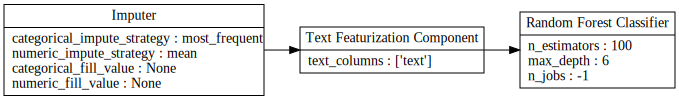

In [32]:
best_pipeline.graph()

In [33]:
scores = best_pipeline.score(X_holdout, y_holdout,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.7671846194363972


# Classification with Word2Vec and SVM

In [34]:
import spacy

In [35]:
import en_core_web_lg

In [38]:
#spacy.load('en_core_web_lg')

In [39]:
nlp = en_core_web_lg.load()

In [40]:
x = "cat dog"
doc = nlp(x)

In [41]:
doc.vector.shape

(300,)

In [42]:
def get_vec(k):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [43]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [44]:
tweet.head()

id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this earthquake ma...   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  all residents asked to shelter in place are be...   
3   6     NaN      NaN  130 people receive wildfires evacuation orders...   
4   7     NaN      NaN  just got sent this photo from ruby alaska as s...   

   target  char_counts  word_counts  avg_wordlength  stopwords_counts  \
0       1           57           13        4.384615                 6   
1       1           32            7        4.571429                 0   
2       1          112           22        5.090909                 9   
3       1           57            8        7.125000                 1   
4       1           72           16        4.500000                 6   

   hashtag_counts  mentions_counts  digits_counts  uppercase_counts  \
0               1                0              0                 1   
1               0                0              1                 0   
2               0                0              1                 0   
3               1                0              1                 0   
4               2                0              0                 0   

                                                 vec  
0  [-0.27621502, 0.173051, -0.106199495, -0.28751...  
1  [-0.27621502, 0.173051, -0.106199495, -0.28751...  
2  [-0.27621502, 0.173051, -0.106199495, -0.28751...  
3  [-0.27621502, 0.173051, -0.106199495, -0.28751...  
4  [-0.27621502, 0.173051, -0.106199495, -0.28751...

In [45]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1,1)

In [46]:
X.shape

(18983, 1)

In [48]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [49]:
X.shape

(18983, 300)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [55]:
X_test.shape

(3797, 300)

In [56]:
%%time
clf2 = LinearSVC()
run_SVM(clf2, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      2720
           1       0.00      0.00      0.00      1077

    accuracy                           0.72      3797
   macro avg       0.36      0.50      0.42      3797
weighted avg       0.51      0.72      0.60      3797

CPU times: user 15.6 s, sys: 183 ms, total: 15.8 s
Wall time: 16 s


/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Word Embeddings and Classification with Deep Learning

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [59]:
token = Tokenizer()
token.fit_on_texts(text)

In [60]:
vocab_size = len(token.word_index) + 1
vocab_size

42955

In [93]:
text.shape

(18983,)

In [94]:
token

In [61]:
token.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'httpst': 4,
 'of': 5,
 'in': 6,
 'and': 7,
 'i': 8,
 'httpt': 9,
 'is': 10,
 'you': 11,
 'for': 12,
 'on': 13,
 'that': 14,
 'it': 15,
 'this': 16,
 'not': 17,
 'my': 18,
 'with': 19,
 'are': 20,
 'at': 21,
 'have': 22,
 'was': 23,
 'by': 24,
 'from': 25,
 'be': 26,
 'we': 27,
 'as': 28,
 'but': 29,
 'so': 30,
 'an': 31,
 'just': 32,
 'will': 33,
 'has': 34,
 'they': 35,
 'like': 36,
 'do': 37,
 'all': 38,
 'amp': 39,
 'me': 40,
 'your': 41,
 'out': 42,
 'if': 43,
 'he': 44,
 'up': 45,
 'people': 46,
 'when': 47,
 'about': 48,
 'no': 49,
 'after': 50,
 'who': 51,
 'am': 52,
 'what': 53,
 'been': 54,
 'one': 55,
 'can': 56,
 'or': 57,
 'now': 58,
 'how': 59,
 'more': 60,
 'his': 61,
 'fire': 62,
 'there': 63,
 'get': 64,
 'were': 65,
 'new': 66,
 'our': 67,
 'us': 68,
 'would': 69,
 'its': 70,
 'over': 71,
 'their': 72,
 'into': 73,
 '2': 74,
 'had': 75,
 'some': 76,
 'her': 77,
 'time': 78,
 'know': 79,
 'she': 80,
 'news': 81,
 'emergency': 82,
 'them':

In [62]:
encoded_text = token.texts_to_sequences(text)

In [63]:
encoded_text

[[67, 5862, 20, 1, 792, 5, 16, 285, 176, 1945, 2798, 68, 38],
 [234, 62, 236, 954, 13870, 13871, 1487],
 [38,
  1101,
  1102,
  3,
  2030,
  6,
  410,
  20,
  92,
  7059,
  24,
  2108,
  49,
  203,
  478,
  57,
  2030,
  6,
  410,
  2031,
  20,
  1219],
 [4363, 46, 2799, 1539, 478, 2031, 6, 238],
 [32,
  110,
  935,
  16,
  718,
  25,
  13872,
  3006,
  28,
  242,
  25,
  1539,
  13873,
  73,
  2,
  287],
 [5863,
  354,
  238,
  2458,
  616,
  858,
  6,
  355,
  4364,
  210,
  3,
  1391,
  492,
  62,
  9115,
  1539],
 [252, 116, 670, 263, 1038, 1220, 445, 5, 1242, 6, 13874, 1540, 2613, 837],
 [8, 52, 13, 336, 5, 1, 2800, 7, 8, 56, 93, 2, 62, 6, 1, 3007],
 [63, 10, 31, 82, 478, 1147, 58, 6, 1, 682, 453, 1, 838],
 [8, 52, 2210, 14, 1, 500, 10, 288, 3, 67, 337],
 [691, 46, 501, 25, 1, 368, 391, 30, 392],
 [1295,
  311,
  5864,
  10,
  217,
  3565,
  5009,
  638,
  2,
  704,
  8,
  207,
  6,
  311,
  5864,
  53,
  52,
  8,
  312,
  37,
  53,
  52,
  8,
  312,
  37,
  13875,
  445],
 [5010,

In [64]:
max_length = 40
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [65]:
X

array([[   67,  5862,    20, ...,     0,     0,     0],
       [  234,    62,   236, ...,     0,     0,     0],
       [   38,  1101,  1102, ...,     0,     0,     0],
       ...,
       [    8,   224,  2434, ...,     0,     0,     0],
       [  472,    51,   274, ...,     0,     0,     0],
       [ 5998, 42953,   615, ...,     0,     0,     0]], dtype=int32)

In [66]:
X.shape

(18983, 40)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [68]:
%%time
clf2 = LinearSVC()
run_SVM(clf2, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      2720
           1       0.29      0.51      0.37      1077

    accuracy                           0.50      3797
   macro avg       0.50      0.50      0.48      3797
weighted avg       0.60      0.50      0.53      3797

CPU times: user 2.09 s, sys: 33.3 ms, total: 2.12 s
Wall time: 2.09 s


/Users/serdar/Documents/udel/python/nlpDisaster/env/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
vec_size = 100

In [72]:
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))
model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           4295500   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 32)            6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 19, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 19, 32)            1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 19, 16)           

In [75]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
475/475 [==============================] - 21s 42ms/step - loss: 0.5899 - accuracy: 0.7210 - val_loss: 0.4747 - val_accuracy: 0.8151
Epoch 2/5
475/475 [==============================] - 24s 51ms/step - loss: 0.3892 - accuracy: 0.8425 - val_loss: 0.4334 - val_accuracy: 0.8301
Epoch 3/5
475/475 [==============================] - 29s 61ms/step - loss: 0.2515 - accuracy: 0.9019 - val_loss: 0.4396 - val_accuracy: 0.8083
Epoch 4/5
475/475 [==============================] - 30s 64ms/step - loss: 0.1557 - accuracy: 0.9423 - val_loss: 0.4358 - val_accuracy: 0.8130
Epoch 5/5
475/475 [==============================] - 25s 53ms/step - loss: 0.0833 - accuracy: 0.9730 - val_loss: 0.5233 - val_accuracy: 0.8133
CPU times: user 4min 49s, sys: 2min 7s, total: 6min 56s
Wall time: 2min 9s


In [101]:
def get_encoded(x):
    x = get_clean(x)
    x = token.texts_to_sequences([x])
    x = pad_sequences(x, maxlen=max_length, padding='post')
    return x

In [105]:
x = 'I am thrilled to see this'
vec = get_encoded(x)
vec

array([[    8,    52, 35941,     3,    93,    16,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]], dtype=int32)

In [104]:
np.argmax(model.predict(vec), axis = -1)

array([0])

# Bert Model Building and Training

In [106]:
!pip install ktrain

  Using cached https://files.pythonhosted.org/packages/e1/3c/8469632f3fa51f244ce35ac184de4c55a260dccfcb7386529faf82ebf60f/ktrain-0.25.4.tar.gz
    100% |████████████████████████████████| 7.2MB 2.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/eb/1f/c61b92d806fbd06ad75d08440efe7f2bd1006ba0b15d086debed49d93cdc/fastprogress-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/a3/8407c1e62d5980188b4acc45ef3d94b933d14a2ebc9ef3505f22cf772570/langdetect-1.0.8.tar.gz
  Using cached https://files.pythonhosted.org/packages/c6/cb/18eeb235f833b726522d7ebed54f2278ce28ba9438e3135ab0278d9792a2/jieba-0.42.1.tar.gz
    100% |████████████████████████████████| 133kB 1.8MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8c/76/a49e73a04b3e3a14ce232e8e28a1587f8108baa665644fe8c40e307e792e/syntok-1.3.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/93/e5/b7705156a77f742cfe4fc6f22d0c71591edb2d243328dff2f8fc0f933ab6/seqeval-0

    100% |████████████████████████████████| 256kB 645kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/09/70/b63ed8fc660da2bb6ae29b9895401c628da5740c048c190b5d7107cadd02/keras-pos-embd-0.11.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/e6/32/45adf2549450aca7867deccfa04af80a0ab1ca139af44b16bc669e0e09cd/keras-multi-head-0.27.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/a4/0e/d1078df0494bac9ce1a67954e5380b6e7569668f0f3b50a9531c62c1fc4a/keras-layer-normalization-0.14.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/59/f0faa1037c033059e7e9e7758e6c23b4d1c0772cd48de14c4b6fd4033ad5/keras-position-wise-feed-forward-0.6.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/57/ef/61a1e39082c9e1834a2d09261d4a0b69f7c818b359216d4e1912b20b1c86/keras-embed-sim-0.8.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/15/6b/c804924a056955fa1f3ff767945187103cfc851ba9bd0fc5a6c6bc18e2eb/keras-self-attention-0.4

In [3]:
from ktrain import text
import ktrain

In [17]:
tweet.head()

id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this earthquake ma...   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  all residents asked to shelter in place are be...   
3   6     NaN      NaN  130 people receive wildfires evacuation orders...   
4   7     NaN      NaN  just got sent this photo from ruby alaska as s...   

   target  char_counts  word_counts  avg_wordlength  stopwords_counts  \
0       1           57           13        4.384615                 6   
1       1           32            7        4.571429                 0   
2       1          112           22        5.090909                 9   
3       1           57            8        7.125000                 1   
4       1           72           16        4.500000                 6   

   hashtag_counts  mentions_counts  digits_counts  uppercase_counts  
0               1                0              0                 1  
1               0                0              1                 0  
2               0                0              1                 0  
3               1                0              1                 0  
4               2                0              0                 0

In [18]:
(X_train, y_train), (X_test, y_test), preproc= text.texts_from_df(train_df=tweet, text_column='text', label_columns='target', maxlen=40, preprocess_mode='bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [21]:
model = text.text_classifier(name='bert', train_data=(X_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40
done.


In [22]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data=(X_test, y_test), batch_size=64)

In [24]:
learner.fit_onecycle(lr=2e-4, epochs=1)



begin training using onecycle policy with max lr of 0.0002...
  8/267 [..............................] - ETA: 2:51:00 - loss: 1.8805 - accuracy: 0.7188

KeyboardInterrupt: 

In [ ]:
preditor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
data = ['I met you today by accident', 'I got today car accident, I am injured']

In [ ]:
predictor.predict(data, return_proba=True)

In [25]:
predictor.predict(data)

NameError: name 'predictor' is not defined

In [26]:
predictor.get_classes()

NameError: name 'predictor' is not defined

In [ ]:
y_train